## Step 1: Data cleaning

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the DataFrame
df = pd.read_csv('../data/property_data.csv')

# Remove any duplicate rows from the dataframe
df = df.drop_duplicates()

# Dropping unnecessary columns
df = df.drop(columns=['Raw num:', 'ID number'])

# Keep only numeric columns in dataframe
df = df.select_dtypes(include=[np.number])

# Replace none values with the mean of each column
df = df.fillna(df.mean())

## 1.2 Correlation 


Columns to drop: []


,Zip code,Kitchen,Price of property in euro,Number of bedrooms,Living area,Terrace,Terrace area,Garden,Garden area,Surface of the land(or plot of land),Number of facades,Swimming pool
0,1170.0,1.0,749000.0,5.0,205.0,1.0,14.0,1.0,152.0,220.0,2.0,1.0
1,1933.0,1.0,755000.0,5.0,241.0,1.0,33.0,1.0,300.0,500.0,4.0,1.0
2,1300.0,1.0,435000.0,4.0,185.0,1.0,30.0,1.0,526.0,748.0,4.0,1.0
3,1420.0,1.0,320000.0,3.0,88.0,1.0,20.0,1.0,250.0,405.0,3.0,1.0
4,4420.0,1.0,319000.0,3.0,194.0,1.0,34.0,1.0,82.0,197.0,2.0,1.0


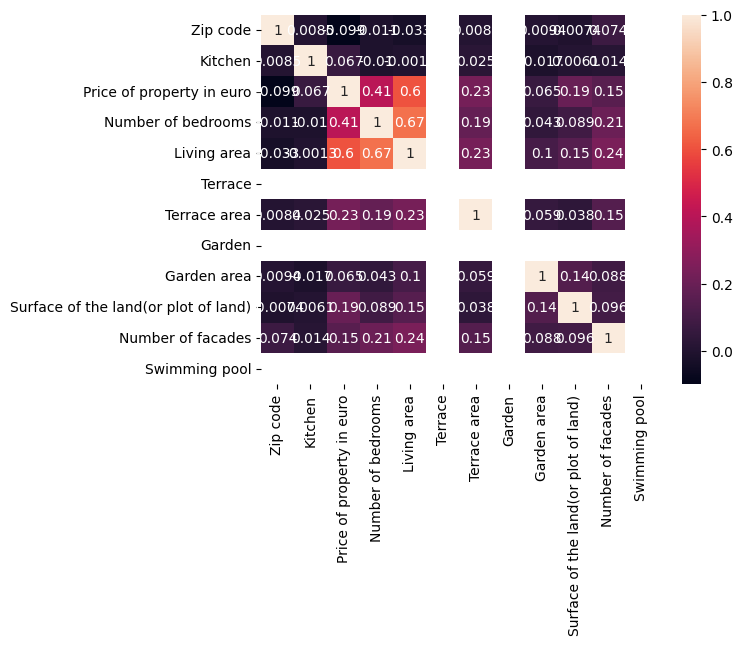

In [15]:
# Calculate the correlation matrix of your features
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

# Define a threshold for strong correlation (you can change this value as needed)
threshold = 0.8

# Create an empty list to store the names of the features to drop
to_drop = []

# Loop through the correlation matrix and find the pairs that have a high correlation coefficient
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            # If the correlation coefficient is above the threshold, add the name of the feature to the list
            to_drop.append(corr_matrix.columns[j])

# Print the list of columns to drop
print('Columns to drop:', to_drop)

# Drop the features from the dataframe
df = df.drop(to_drop, axis=1)

df.head()



## Step 2: Data formatting

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Price of property in euro')  # Features
y = df['Price of property in euro']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 3: Model selection

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Linear Regression MSE: 149459676116.06934
Accuracy: 0.46991203560884487


#### Plot

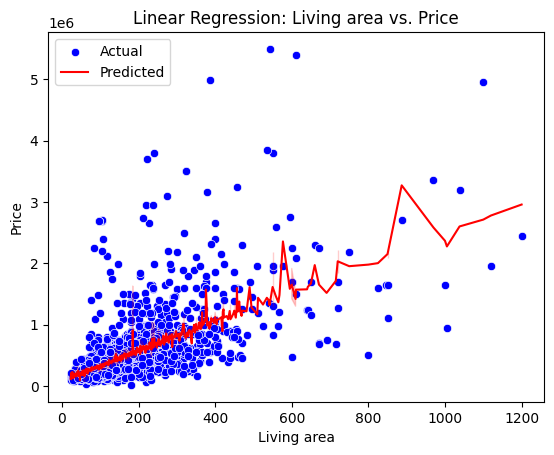

In [18]:
# Create a dataframe with the actual and predicted values
results_df = pd.DataFrame({'Living area': X_test['Living area'], 'Actual': y_test, 'Predicted': y_pred})

# Filter the dataframe to limit the price and living area
results_df = results_df[(results_df['Actual'] <= 6000000) & (results_df['Living area'] <= 1300)]

# Plot the actual prices vs. predicted prices using Seaborn
sns.scatterplot(data=results_df, x='Living area', y='Actual', color='blue', label='Actual')
sns.lineplot(data=results_df, x='Living area', y='Predicted', color='red', label='Predicted')

# Set plot labels and title
plt.xlabel('Living area')
plt.ylabel('Price')
plt.title('Linear Regression: Living area vs. Price')

# Show the legend
plt.legend()

# Display the plot
plt.show()


### Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor model
tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Decision Tree MSE: {mse}")

accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Decision Tree MSE: 114343549692.73303
Accuracy: 0.5944582440362791


### XGBoost Regressor

In [20]:
from xgboost import XGBRegressor

# Create a XGBoost Regressor model
xgb_reg = XGBRegressor(random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse}")

accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


XGBoost MSE: 59344522295.36637
Accuracy: 0.7895230483646548


### Stochastic Gradient Descent

In [21]:
from sklearn.linear_model import SGDRegressor

# Create a SGD Regressor model
sgd_reg = SGDRegressor(random_state=42)

# Train the model
sgd_reg.fit(X_train, y_train)

# Make predictions
y_pred = sgd_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"SGD MSE: {mse}")

accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


SGD MSE: 1.8120621304910163e+32
Accuracy: -6.42683264853541e+20


## Step 6: Model explainability